<a href="https://colab.research.google.com/github/thiagoteles10/Analise-de-Recursos-humanos/blob/main/projeto_de_machine_learning_recursos_humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# visualização
import seaborn as sns
import missingno

# machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# importando o modelo random forest
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore') # filtro de warnings

In [2]:
df = pd.read_csv('recursos_humanos.csv')

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe().round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


### Valores ausentes

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

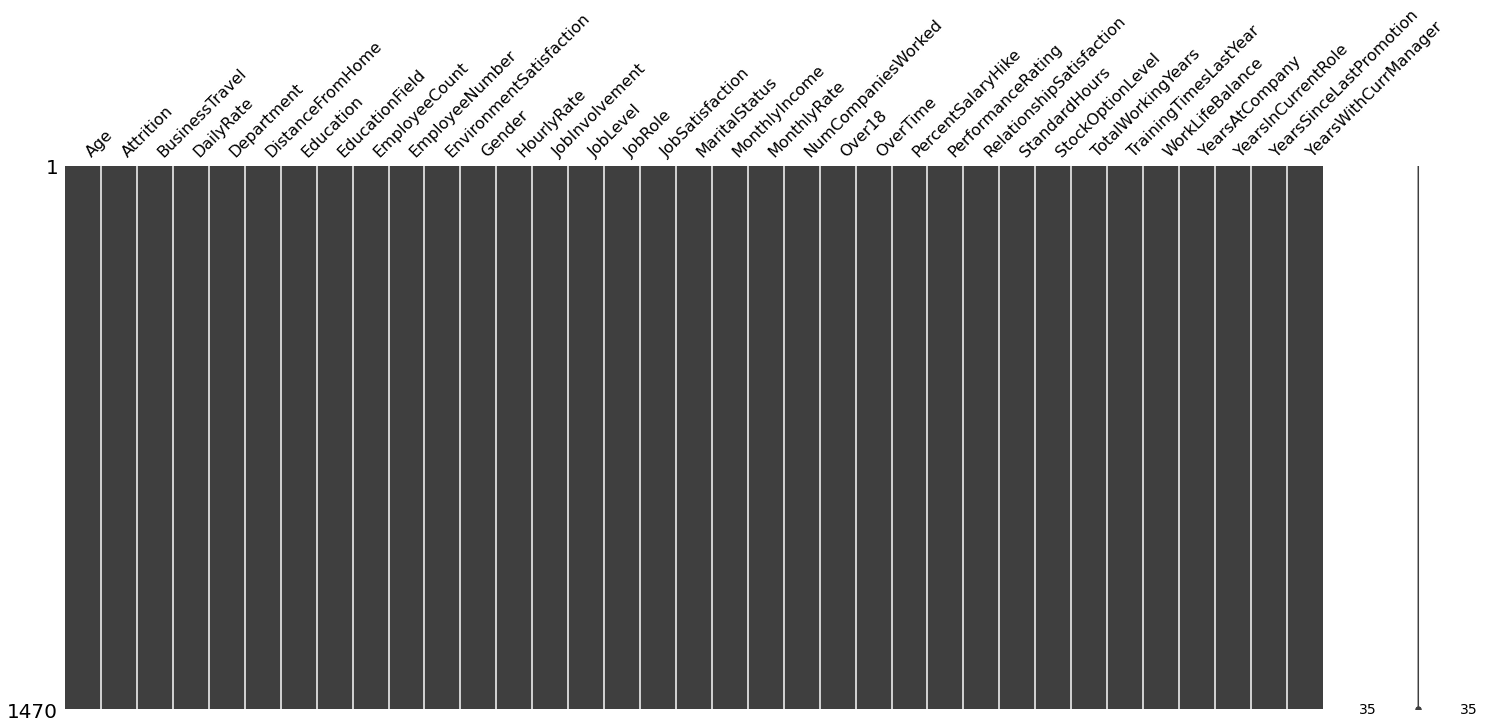

In [9]:
missingno.matrix(df);

In [10]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [12]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df['Over18'].unique()

array(['Y'], dtype=object)

#### Alterando a coluna df['Attrition'] para valores 0 e 1

In [14]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == "Yes" else 0 )

In [15]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Alterando a coluna df['OverTime']

In [16]:
df['OverTime'] = df['OverTime'].apply(lambda x : 1 if x == "Yes" else 0 )

In [17]:
df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0 )

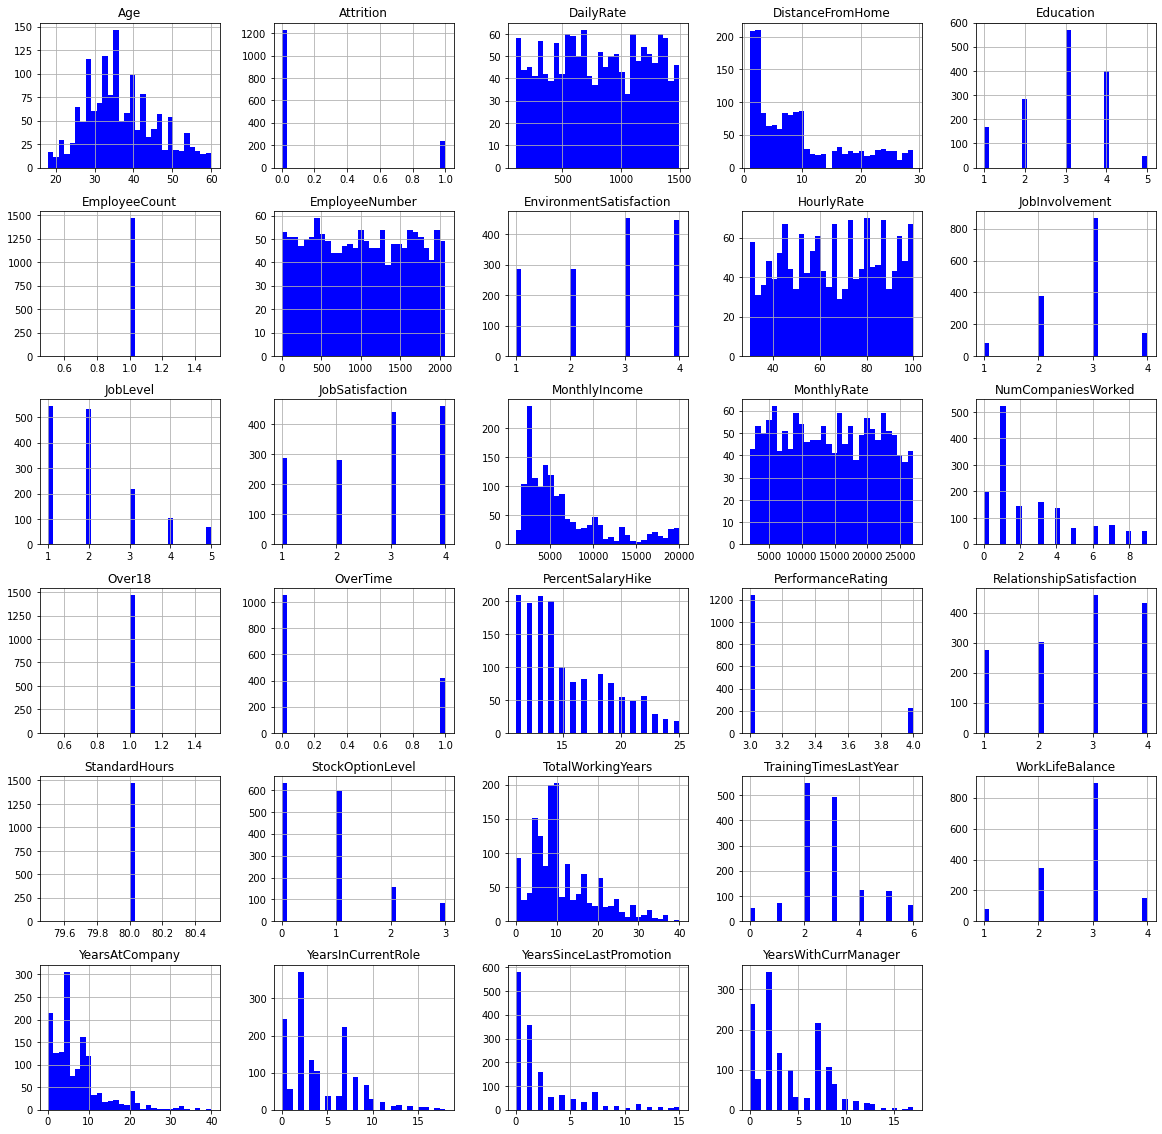

In [20]:
df.hist(bins=30,figsize=(20,20),color='blue');

In [21]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [22]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [23]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [24]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [25]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [26]:
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1, inplace=True)

In [27]:
df.shape

(1470, 31)

In [28]:
# Criando um dataframe com os funcionários que saíram da empresa
d_df = df[df['Attrition'] == 1]

In [29]:
# criando um dataframe com os funcionários que ainda trabalham na empresa
f_df = df[df['Attrition'] == 0]

In [30]:
print(f'total: {len(df)}')

total: 1470


In [31]:
# número de funcionários que deixaram a empresa
print(f'número de funcionários que saíram da empresa: {len(d_df)}')

número de funcionários que saíram da empresa: 237


In [32]:
# percentual de funcionários que deixaram a empresa
print(f' o número de funcionários que deixaram a empresa é : {(237/1470) * 100}%')

 o número de funcionários que deixaram a empresa é : 16.122448979591837%


In [33]:
# Número de funcionários que continuam na empresa
print(f" o número de funcionários que continuam na empresa: {len(f_df)}")

 o número de funcionários que continuam na empresa: 1233


In [34]:
# percentual de funcionários que continuam na empresa
print(f' o número de funcionários que continuam na empresa é : {(1233/1470) * 100}%')

 o número de funcionários que continuam na empresa é : 83.87755102040816%


In [35]:
df.describe().round(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,0.16,802.49,9.19,2.91,2.72,65.89,2.73,2.06,2.73,...,3.15,2.71,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,0.37,403.51,8.11,1.02,1.09,20.33,0.71,1.11,1.10,...,0.36,1.08,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,0.00,102.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,...,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,0.00,465.00,2.00,2.00,2.00,48.00,2.00,1.00,2.00,...,3.00,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,0.00,802.00,7.00,3.00,3.00,66.00,3.00,2.00,3.00,...,3.00,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,0.00,1157.00,14.00,4.00,4.00,83.75,3.00,3.00,4.00,...,3.00,4.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1.00,1499.00,29.00,5.00,4.00,100.00,4.00,5.00,4.00,...,4.00,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [36]:
d_df.describe().round(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.00,237.0,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,...,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00
mean,33.61,1.0,750.36,10.63,2.84,2.46,65.57,2.52,1.64,2.47,...,3.16,2.60,0.53,8.24,2.62,2.66,5.13,2.90,1.95,2.85
std,9.69,0.0,401.90,8.45,1.01,1.17,20.10,0.77,0.94,1.12,...,0.36,1.13,0.86,7.17,1.25,0.82,5.95,3.17,3.15,3.14
min,18.00,1.0,103.00,1.00,1.00,1.00,31.00,1.00,1.00,1.00,...,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,28.00,1.0,408.00,3.00,2.00,1.00,50.00,2.00,1.00,1.00,...,3.00,2.00,0.00,3.00,2.00,2.00,1.00,0.00,0.00,0.00
50%,32.00,1.0,699.00,9.00,3.00,3.00,66.00,3.00,1.00,3.00,...,3.00,3.00,0.00,7.00,2.00,3.00,3.00,2.00,1.00,2.00
75%,39.00,1.0,1092.00,17.00,4.00,4.00,84.00,3.00,2.00,3.00,...,3.00,4.00,1.00,10.00,3.00,3.00,7.00,4.00,2.00,5.00
max,58.00,1.0,1496.00,29.00,5.00,4.00,100.00,4.00,5.00,4.00,...,4.00,4.00,3.00,40.00,6.00,4.00,40.00,15.00,15.00,14.00


### Visualizando as correlações

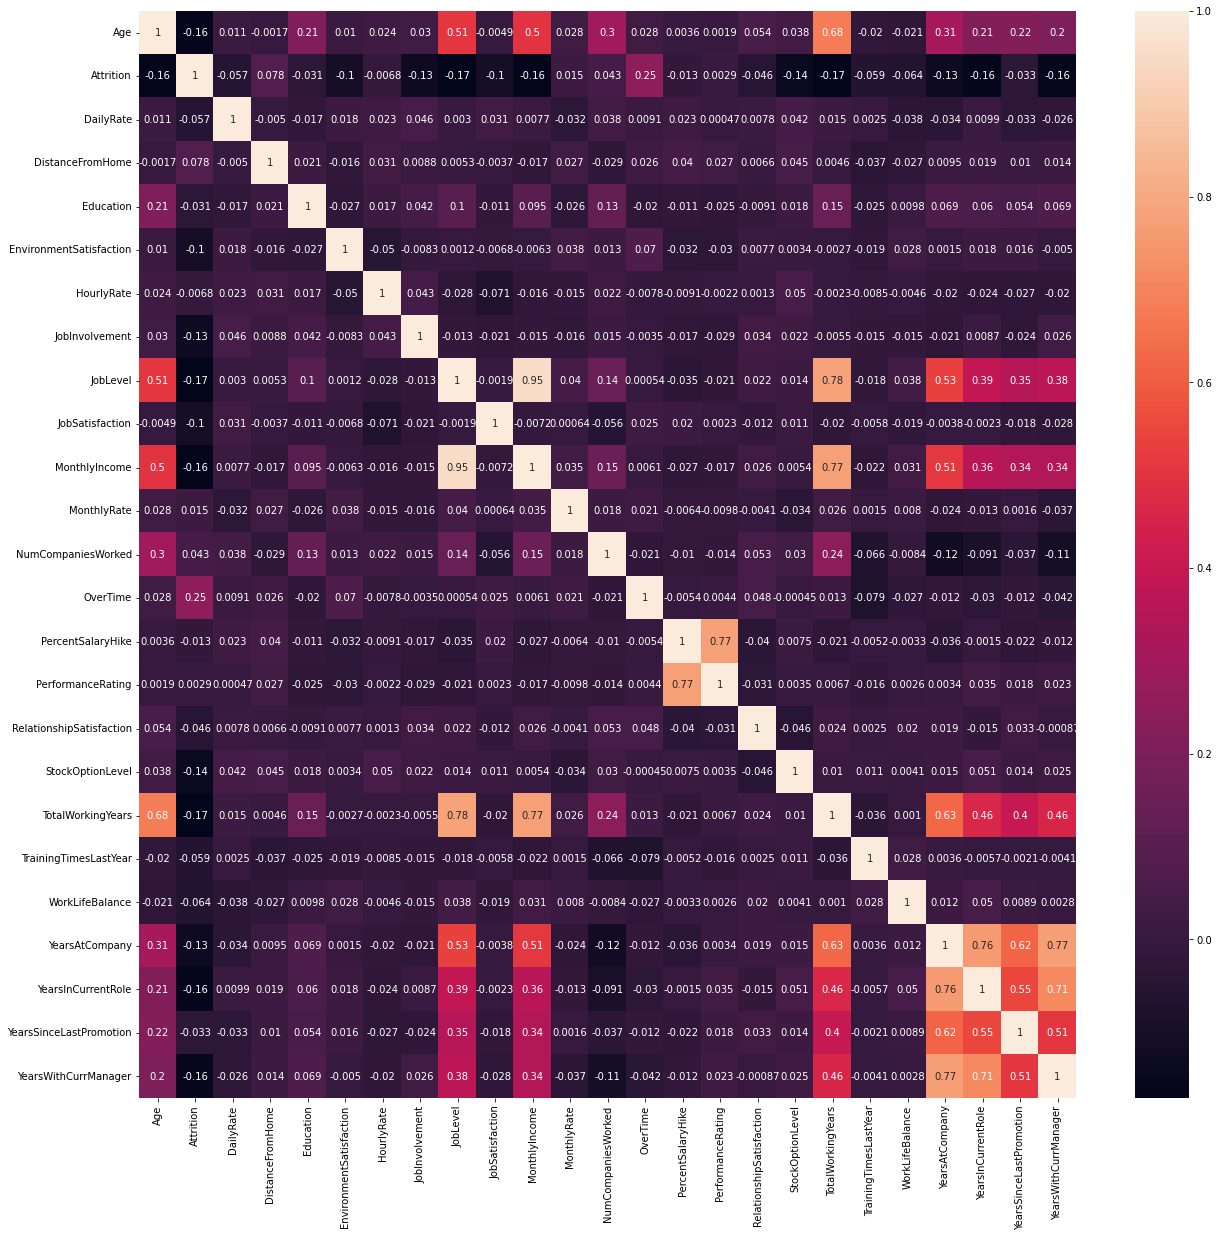

In [37]:
corr = df.corr()
f, ax = plt.subplots(figsize=(21,20));
sns.heatmap(corr, annot=True);

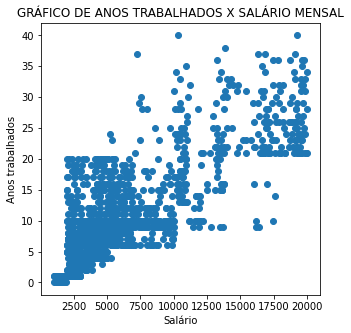

In [38]:
plt.figure(figsize=(5,5))
plt.scatter(df['MonthlyIncome'],df['TotalWorkingYears']);
plt.title('GRÁFICO DE ANOS TRABALHADOS X SALÁRIO MENSAL');
plt.xlabel('Salário');
plt.ylabel('Anos trabalhados');

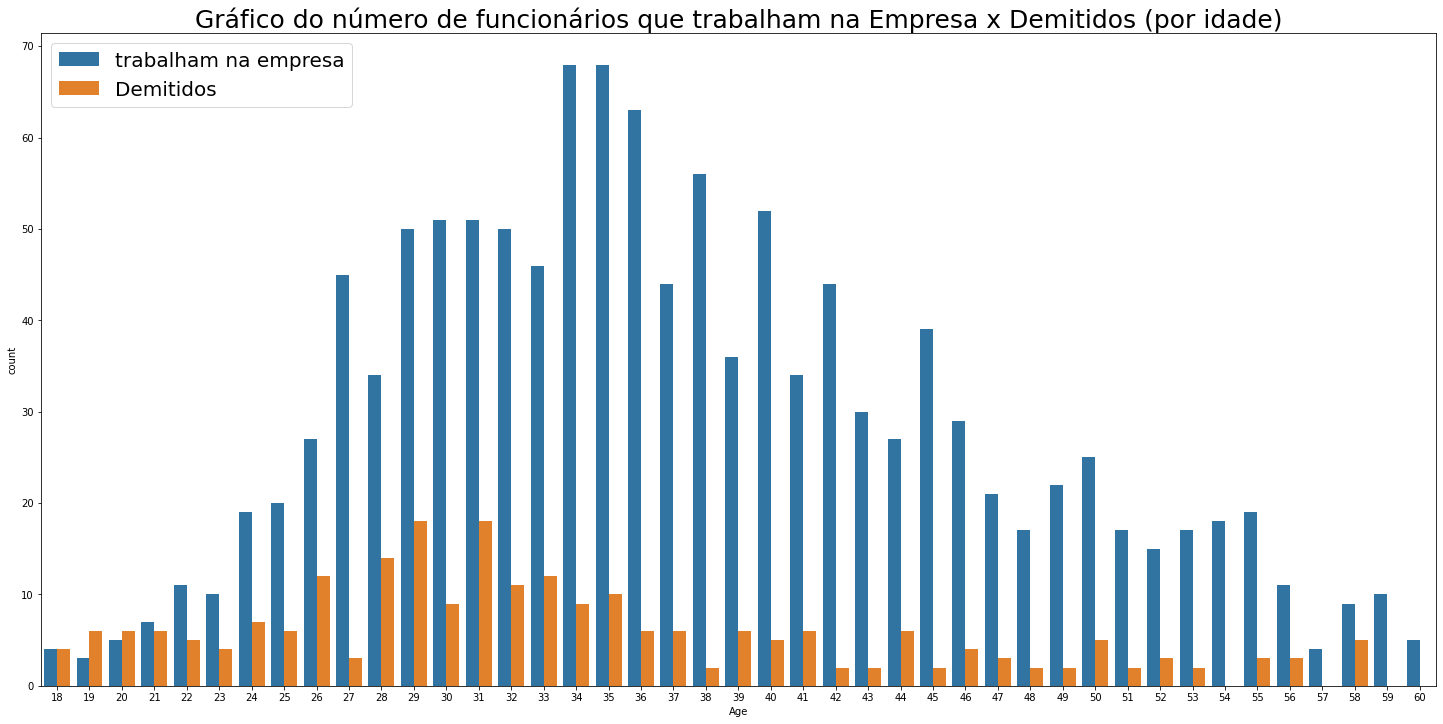

In [39]:
plt.figure(figsize=(25,12))
sns.countplot(x = 'Age', hue='Attrition', data= df);
plt.legend(['trabalham na empresa','Demitidos'],fontsize=20);
plt.title('Gráfico do número de funcionários que trabalham na Empresa x Demitidos (por idade)',fontsize=25);

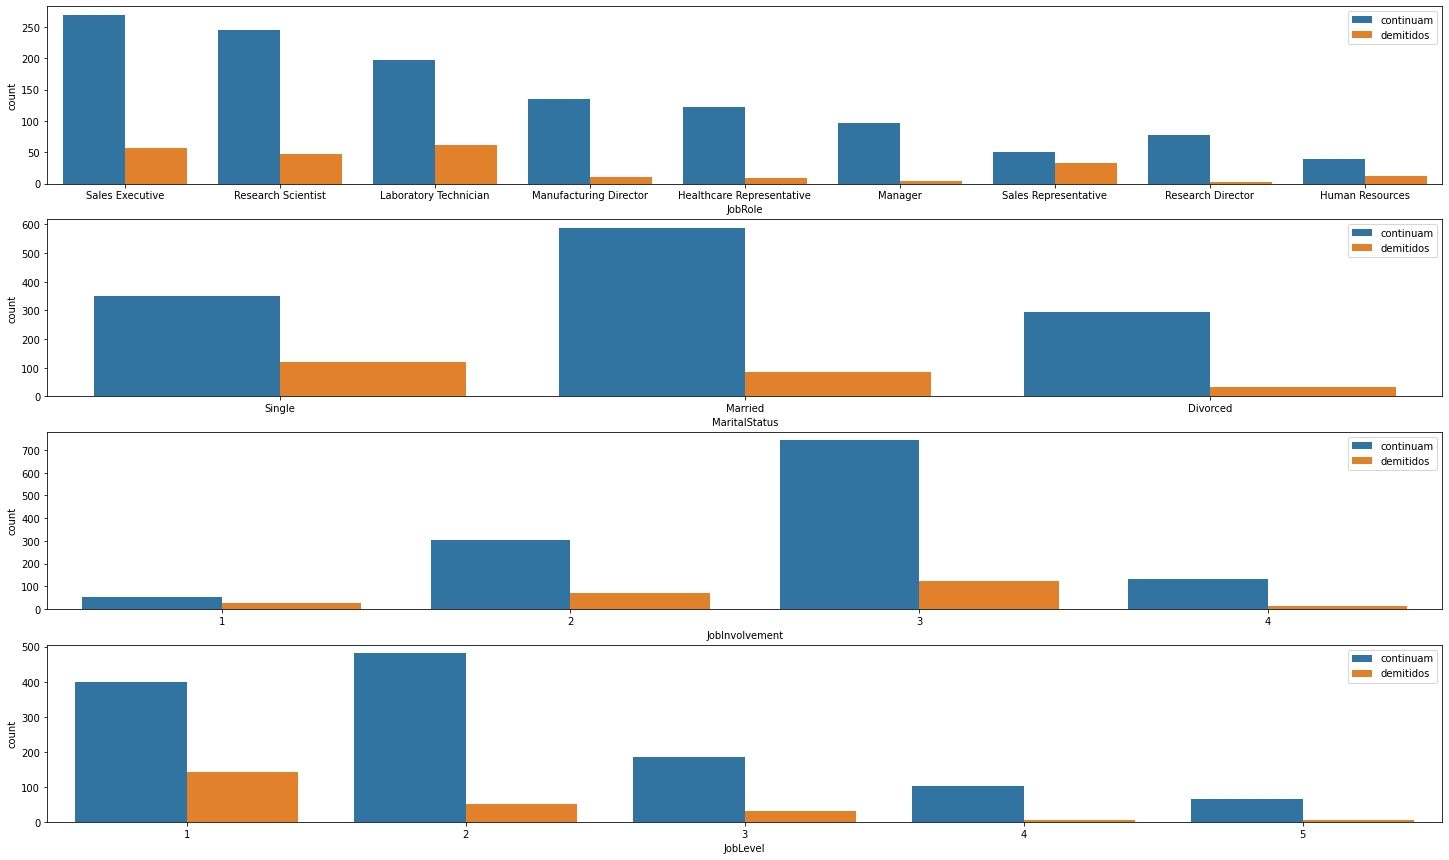

In [40]:
plt.figure(figsize=(25,15))
plt.subplot(411)
sns.countplot(x = 'JobRole', hue='Attrition', data= df);
plt.legend(['continuam','demitidos'])
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue='Attrition', data= df);
plt.legend(['continuam','demitidos'])
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue='Attrition', data= df);
plt.legend(['continuam','demitidos'])
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue='Attrition', data= df);
plt.legend(['continuam','demitidos'])


Text(0.5, 0, 'Distância de casa')

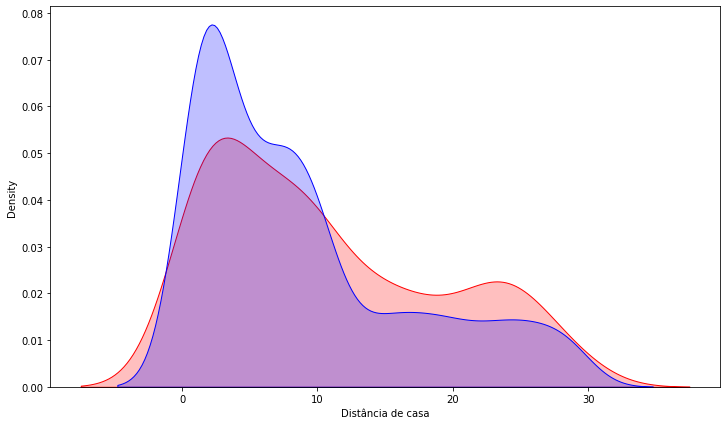

In [41]:
plt.figure(figsize=(12,7))
sns.kdeplot(d_df['DistanceFromHome'], label= 'Funcionários que saíram', shade=True, color='red')
sns.kdeplot(f_df['DistanceFromHome'], label= 'Funcionários que ficaram', shade=True, color='blue')
plt.xlabel('Distância de casa')

### Distribuição do salário por sexo

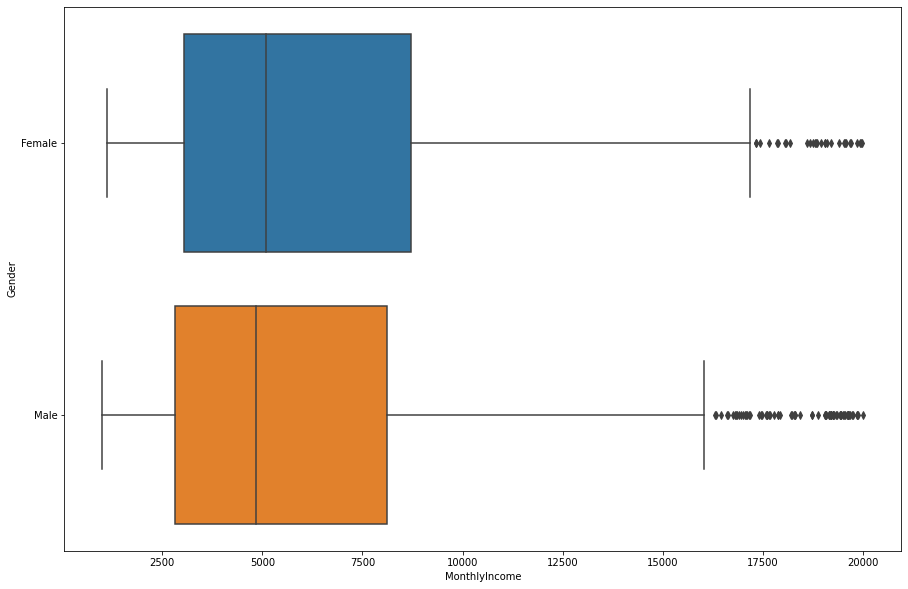

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome',y='Gender', data=df);

### Sálários por cargo ocupado

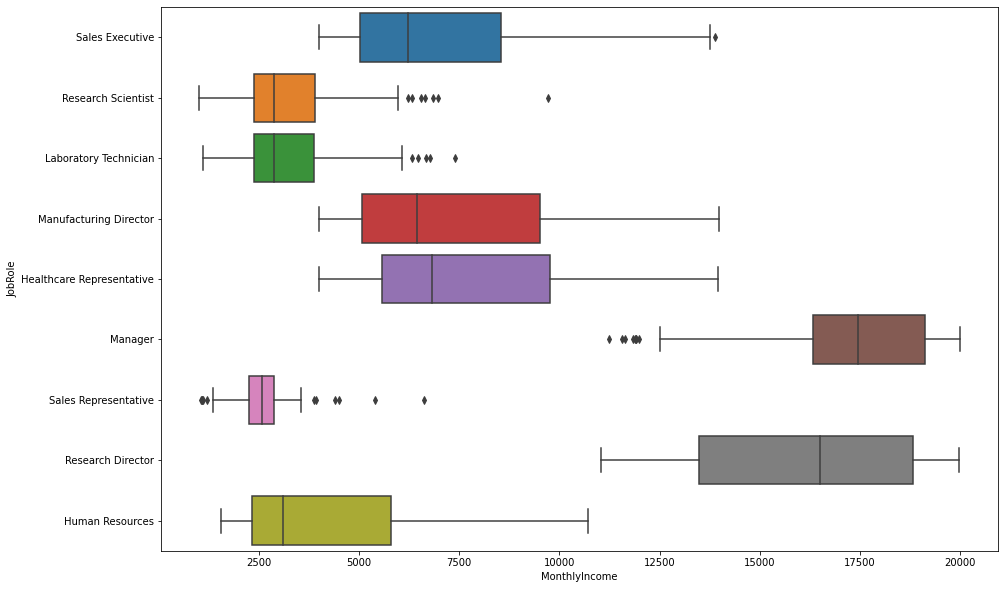

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome',y='JobRole', data=df);

In [44]:
# maior salário mensal
df['MonthlyIncome'].unique().max()


19999

In [45]:
# menor salário mensal
df['MonthlyIncome'].unique().min()

1009

In [46]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Modelo de machine learning usando logistic regression

In [47]:
# criando um dataframe com variáveis categóricas
x_categorica = df[['BusinessTravel','Department','EducationField','Gender','JobLevel','MaritalStatus']]

In [48]:
x_categorica

,BusinessTravel,Department,EducationField,Gender,JobLevel,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,2,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,2,Married
2,Travel_Rarely,Research & Development,Other,Male,1,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,1,Married
4,Travel_Rarely,Research & Development,Medical,Male,1,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,2,Married
1466,Travel_Rarely,Research & Development,Medical,Male,3,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,2,Married
1468,Travel_Frequently,Sales,Medical,Male,2,Married


In [49]:
# recebendo a função
ohe = OneHotEncoder()

In [50]:
x_categorica = ohe.fit_transform(x_categorica).toarray()

In [51]:
x_categorica.shape

(1470, 22)

In [52]:
type(x_categorica)

numpy.ndarray

In [53]:
x_categorica = pd.DataFrame(x_categorica)

In [54]:
type(x_categorica)

pandas.core.frame.DataFrame

In [55]:
x_categorica

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [57]:
x_numerica = df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobSatisfaction',
                 'MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [58]:
x_numerica.shape

(1470, 23)

In [59]:
# concatenar dataframe
x = pd.concat([x_categorica, x_numerica],axis=1)

In [60]:
x.head(3)

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0


In [61]:
y = df['Attrition']

In [62]:
# separando os dados em dados de treino e dados de teste
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25)

In [63]:
x_train.shape

(1102, 45)

In [64]:
x_test.shape

(368, 45)

In [65]:
# recebendo a função 
scaler = MinMaxScaler()

In [66]:
# normalizando os  dados
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [67]:
type(x_test)

numpy.ndarray

In [68]:
type(y)

pandas.core.series.Series

In [69]:
# modelo de machine learning
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [70]:
pred = model.predict(x_test)

In [71]:
# pegando os sete primeiros resultados da previsão
print(pred[:7])

[0 0 0 0 0 0 0]


In [72]:
# mostra a probabilidade dos valores serem 0 ou 1
pred_proba = model.predict_proba(x_test)
print(pred_proba[:7])

[[0.98469472 0.01530528]
 [0.9956267  0.0043733 ]
 [0.97333114 0.02666886]
 [0.97372067 0.02627933]
 [0.87491825 0.12508175]
 [0.85861945 0.14138055]
 [0.97603491 0.02396509]]


In [73]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Comparando o modelo atual com o modelo previsto pelo algoritmo

In [74]:
atual_vs_predict = pd.DataFrame({'atual': y_test, 'previsto': pred})

In [75]:
atual_vs_predict.head(20)

,atual,previsto
135,0,0
1040,0,0
1253,0,0
502,0,0
326,0,0
1354,1,0
1300,0,0
966,1,0
21,1,1
559,0,0


In [76]:
print(f'Acurracy: {accuracy_score(pred,y_test) * 100}' )

Acurracy: 86.68478260869566


### Usando uma matrix  de confulsão

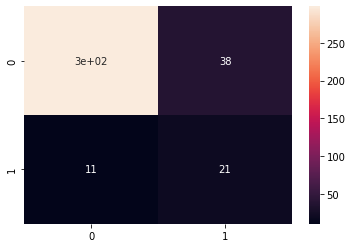

In [77]:
conf_matrix = confusion_matrix(pred, y_test)
sns.heatmap(conf_matrix, annot=True)

In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       309
           1       0.66      0.36      0.46        59

    accuracy                           0.87       368
   macro avg       0.77      0.66      0.69       368
weighted avg       0.85      0.87      0.85       368



Descrição das métricas

* Precision - Precisão de previsões positivas..
* Reacall - Fração de positivos que foram identificados corretamente.
* f1-score- representa a média harmonica entre precision e recall, sendo 0 o pior valor e 1 o melhor.

### Machine learning usando Random Forest

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

criando a máquina preditiva

In [80]:
maq_RF = RandomForestClassifier(n_estimators=1000)

In [81]:
maq_RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

 Avaliando a acurácia do modelo de machine learning(Random forest)

In [82]:
acuracia = maq_RF.score(x_test,y_test)
acuracia = (acuracia * 100).round(2)

print(f'A acurácia do modelo foi de : {acuracia}%')

A acurácia do modelo foi de : 86.41%
